### Angélica Narvaez
### Catalina Jaramillo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd

## Data 1

In [2]:
mat = loadmat('dado1.mat')
X = mat['X']
Xval = mat['Xval']
yval = mat['yval']

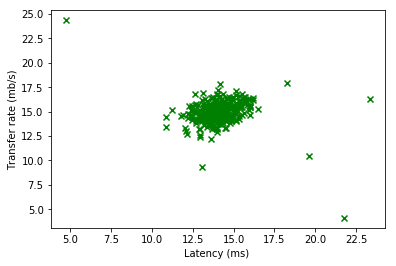

In [3]:
plt.scatter(X[:,0],X[:,1],marker='x', color='green')
plt.xlabel("Latency (ms) ")
plt.ylabel("Transfer rate (mb/s)")
plt.show()

In [4]:
def estimateGaussian(X):
    
    m = X.shape[0]
    
    suma = np.sum(X, axis=0)
    
    mu = (1/m) *suma
    
    var = (1/m)* np.sum((X-mu)**2,axis=0)
    
    return mu,var

In [5]:
# Supposing that variables are not correlated. This is, the covariance matrix is diag(sigma2)

def multivariateGaussian(X,mu,sigma2):
    
    k = len(mu)
    
    sigma2 = np.diag(sigma2)
    X = X-mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5)) * np.exp(-0.5*np.sum(X @ np.linalg.pinv(sigma2)*X,axis=1))
    return p

In [6]:
def selectThreshold(yval, pval):
    best_epi = 0
    best_F1 = 0
    
    # creating a list of epsilons to select the best one
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        # true positive
        tp = np.sum(predictions[yval==1]==1)
        # false positive
        fp = np.sum(predictions[yval==0]==1)
        #false negative
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
        
    return best_epi, best_F1

In [7]:
# mean and sigmas
mu, sigma2 = estimateGaussian(X)
# p(x) for validation set according to multivariate Gaussian N(mu,diag(sigma))
pval = multivariateGaussian(Xval, mu, sigma2)

In [8]:
epsilon, F1 = selectThreshold(yval, pval)
print("The best epsilon obtained by validation:",epsilon)
print("Best F1 on validation:",F1)
# better if it's closer to 1

The best epsilon obtained by validation: 8.990852779269495e-05
Best F1 on validation: 0.8750000000000001


C:\Users\cataj\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


C:\Users\cataj\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


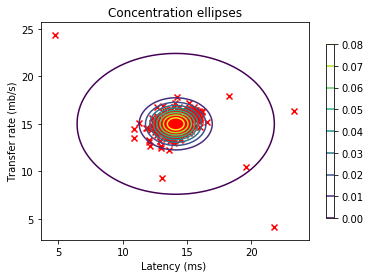

In [9]:
plt.figure()

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

XX = np.vstack((xx.flatten(),yy.flatten())).T

Z = multivariateGaussian(XX,mu,sigma2)

Level = np.arange(epsilon/9000, Z.max(), 0.01)

CSF = plt.contour(xx, yy, Z.reshape(xx.shape),25,color='green', levels= Level)
plt.scatter(X[:,0],X[:,1],marker='x', color='red')

plt.xlabel("Latency (ms) ")
plt.ylabel("Transfer rate (mb/s)")

plt.colorbar(CSF, shrink=0.8, extend='neither')

plt.title('Concentration ellipses')

plt.show()

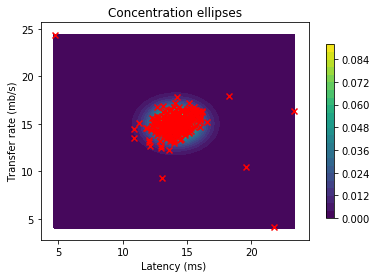

In [10]:
plt.figure()

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

XX = np.vstack((xx.flatten(),yy.flatten())).T

Z = multivariateGaussian(XX,mu,sigma2)

CSF = plt.contourf(xx, yy, Z.reshape(xx.shape),25,color='green')
plt.scatter(X[:,0],X[:,1],marker='x', color='red')

plt.xlabel("Latency (ms) ")
plt.ylabel("Transfer rate (mb/s)")

plt.colorbar(CSF, shrink=0.8, extend='both')

plt.title('Concentration ellipses')


plt.show()

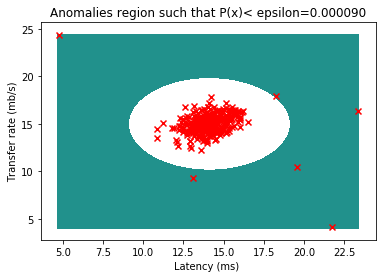

In [11]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

XX = np.vstack((xx.flatten(),yy.flatten())).T

Z = multivariateGaussian(XX,mu,sigma2)

CS = plt.contourf(xx, yy, Z.reshape(xx.shape),2 , color = 'k',levels = [0,epsilon])

CS.cmap.set_over('red')
CS.cmap.set_under('blue')
CS.changed()


plt.scatter(X[:,0],X[:,1],marker='x', color='red')
plt.xlabel("Latency (ms) ")
plt.ylabel("Transfer rate (mb/s)")

# plt.colorbar(CS, shrink=0.8, extend='neither')

plt.title('Anomalies region such that P(x)< epsilon=%f'%epsilon)

plt.show()


## Data 2

In [12]:
mat = loadmat('dado2.mat')
X = mat['X']
Xval = mat['Xval']
yval = mat['yval']

In [13]:
# mean and sigma
mu, sigma2 = estimateGaussian(X)
# p(x) for Xval set according to multivariate Gaussian N(mu,diag(sigma))
pval = multivariateGaussian(Xval, mu, sigma2)

In [14]:
epsilon, F1 = selectThreshold(yval, pval)
print("The best epsilon obtained by validation:",epsilon)
print("Best F1 on validation:",F1)
# better if it's closer to 1

The best epsilon obtained by validation: 1.3772288907613575e-18
Best F1 on validation: 0.6153846153846154


C:\Users\cataj\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


In [15]:
# X[i] is anomaly if p(x)< epsilon. This is the data frame of anomalies

p = multivariateGaussian(X, mu, sigma2)
loc = np.where(p<epsilon)
print('The total of anomalies is ', len(loc[0]),
      '\nThe percentage of anomalies in X is ',float((len(loc)/X.shape[0])*100),'%')
df = pd.DataFrame(X[loc], index = loc[0], columns = ['var'+str(i) for i in range(1,X.shape[1]+1)]) 
df2 = pd.DataFrame(p[loc], index = loc[0], columns = ["p(x)"])
index = df.index
index.name = "Index in X"
df

The total of anomalies is  117 
The percentage of anomalies in X is  0.1 %


,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11
Index in X,,,,,,,,,,,
9,15.107877,-16.430766,19.707360,-19.811888,-1.644537,-6.444184,-6.121214,7.042283,7.232476,17.223479,-2.956852
20,12.411706,3.150959,14.827734,-10.482672,-8.250082,-7.982698,-20.766918,30.689476,4.622547,12.234751,23.167294
21,20.946754,1.048170,8.296324,-2.595042,-14.061970,8.776611,-21.886068,9.769264,-20.071130,13.871906,4.197881
30,5.127033,-18.517137,11.422480,-28.993408,-5.797960,-15.989215,-12.039753,31.296681,8.203208,8.035668,19.519680
39,11.622006,-0.229723,10.005823,-9.700729,-14.765493,26.933578,-9.299882,13.109171,8.976218,8.157170,18.663064
56,-5.689178,-9.707423,22.258180,7.890772,-11.397641,34.445407,-9.836411,-0.179841,-13.261052,15.200689,7.595782
62,16.452993,-15.320026,17.283979,-5.896654,-2.940964,12.148073,-3.422623,15.684343,-20.903409,-0.306900,-8.481797
63,-1.907518,-10.191011,5.041437,-31.539885,0.761368,2.671201,2.149600,11.920996,-10.353145,-5.472842,-7.579770
69,-2.665572,-1.793277,-3.312666,-11.771151,-22.948824,0.657702,4.040898,2.684116,-4.217029,-12.993472,6.657632


In [16]:
index = df2.index
index.name = "Index in X"
print('The probability for each anomaly')
df2

The probability for each anomaly


,p(x)
Index in X,
9,2.997653e-19
20,7.349666e-21
21,1.292807e-19
30,1.619280e-21
39,1.005373e-18
56,4.731257e-19
62,9.315961e-19
63,1.155380e-18
69,1.051353e-18
